In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
df_full = pd.read_csv('data/balance.csv')
df_full.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
df_full.tail()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
399,400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


In [4]:
df = df_full[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']]
df.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Balance    400 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 22.0 KB


In [6]:

df.describe().T[['min', 'max']]

,min,max
Income,10.354,186.634
Limit,855.000,13913.000
Rating,93.000,982.000
Cards,1.000,9.000
Age,23.000,98.000
Education,5.000,20.000
Balance,0.000,1999.000


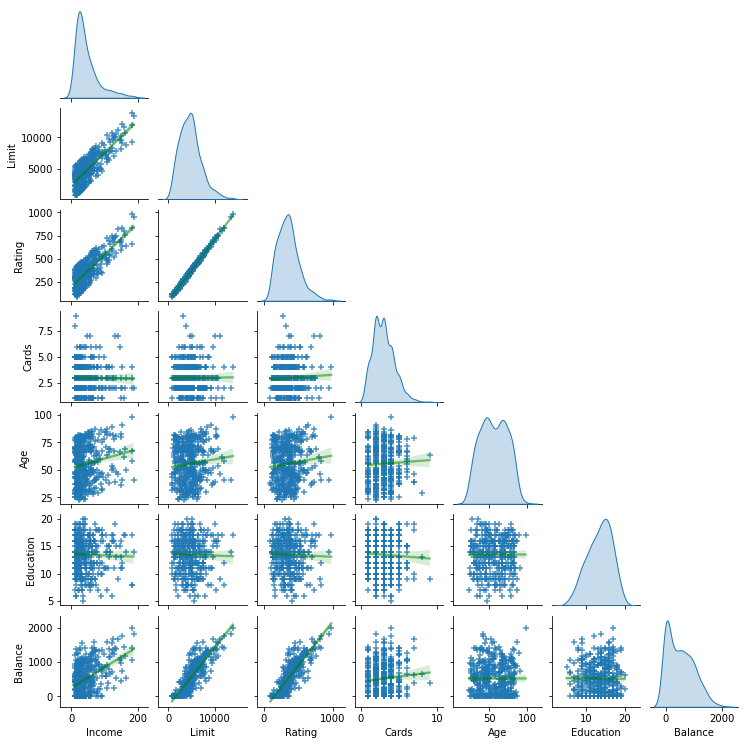

In [12]:
sns.pairplot(df, palette='husl', corner=True, diag_kind='kde', kind='reg', markers='+', 
                 plot_kws={'line_kws':{'color':'Green', 'alpha':0.5}}, height=1.5);

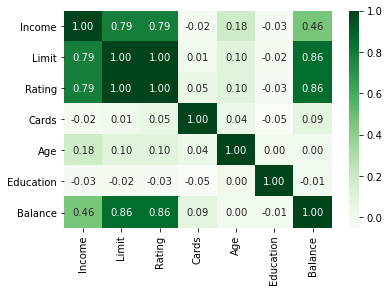

In [10]:
sns.heatmap(df.corr(), annot=True, fmt='0.2f', cmap='Greens');

In [14]:
y = df.Balance
X = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]

In [17]:
model = LinearRegression().fit(X, y)

In [16]:
model.intercept_, model.coef_

(-477.9580884000087,
 array([-7.55803661,  0.12585115,  2.06310071, 11.59155799, -0.89239775,
         1.99828255]))

In [18]:
y_hat = model.predict(X)
list(zip(y, y_hat))[:5]

[(333, 461.99465469511404),
 (903, 545.0319442333807),
 (580, 687.3419743752839),
 (964, 1022.1592906026625),
 (331, 446.97635876015386)]

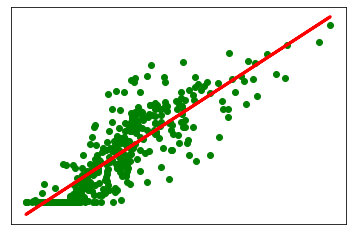

In [26]:
simple_model = LinearRegression()

X_limit_only = X[['Limit']]
simple_model.fit(X_limit_only, y)
y_hat_limit_only = simple_model.predict(X_limit_only)
plt.scatter(X_limit_only, y, color='green')
plt.plot(X_limit_only, y_hat_limit_only, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [23]:
r2_score(y, y_hat)

0.878245293186235

In [22]:
mean_squared_error(y, y_hat) ** 0.5

160.22469571901843